# Data from the Web

#### What do you find in this Notebook?

The purpose of this tutorial session is to offer a **quick** overview on how to scrape a Web page. In details, we illustrate the two main libraries used for this purpose: [Requests](https://requests.kennethreitz.org/en/master/) and [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/). Afterwords, we show how to retrieve data from the Web.

---

*Credits to: [Tiziano Piccardi](https://github.com/tizianopiccardi)*

*Updated by: [Ekaterina Svikhnushina](https://github.com/Sea94) and [Pablo Cañas](https://github.com/pcanas)*

## What is web scraping

The web is a massive knowledge base. Most of the data available is not structured and it is difficult to generate a dataset from which you can extract valuable insights. 

Web scraping is the process of using bots to extract content and data from a website. With web scraping, you can extract underlying HTML code and data stored in a database. As a result, you can generate your own datasets for your data science projects.

## HTTP and HTML

Access to websites is conducted via the [HTTP](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol) protocol. In such, a request to obtain the content of a website (GET request) is sent to a server, and the server sends back HTML code with the content of the website, which renders in our screens. We can also send information to the server via POST requests, for example, when filling a form.

In the following extract, we show the basic HTML structure of a website. The `head` section contains the title and metadata, while the `body` section contains the content of the website.
```
<!DOCTYPE html>
<html>
    <head>
        <title>Page Title</title>
    </head>
    <body>
        <h1>This is a Heading</h1>
        <p>Hello world!</p>
    </body>
</html>
```

## Remark: JSON

[JSON](https://en.wikipedia.org/wiki/JSON) is an open standard file format and data interchange format that uses human-readable text to store and transmit data objects consisting of attribute–value pairs and arrays (or other serializable values). It is a very common data format, with a diverse range of applications, one example being web applications that communicate with a server.

Example of a basic JSON format:

```
{
  "firstName": "John",
  "lastName": "Smith",
  "isAlive": true,
  "age": 27,
  "address": {
    "streetAddress": "21 2nd Street",
    "city": "New York",
    "state": "NY",
    "postalCode": "10021-3100"
  },
  "phoneNumbers": [
    {
      "type": "home",
      "number": "212 555-1234"
    },
    {
      "type": "office",
      "number": "646 555-4567"
    }
  ],
  "children": [],
  "spouse": null
}
```

## Web scraping libraries

To fetch data from the Web with Python, you need to get use to two essential libraries:

 * [`Requests (HTTP)`](https://requests.kennethreitz.org/en/master/): get the `html` page to parse.

 * [`Beautiful Soup (HTML Parsing)`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/): parse the `html` and extract data.

In [23]:
# Import libraries
import requests
from bs4 import BeautifulSoup

### Make a `get` request

The [GET method](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol#Request_methods) retrieves information from the server.

We start scraping this website: https://httpbin.org/ - HTTP Request & Response Service. The website offers some useful endpoints [1] to check the content of our request. Some of them provide an 'echo service' that reply with the request received.

[1] Endpoint is a web address (URL) at which clients of a specific service can gain access to it. By referencing that URL, clients can get to operations provided by that service.

#### Example 1: Get request basics
Here we show an example on how use a get request. In particular, you see that we can get different information about the response:

* The status code [2] which tells us whether everything is fine and if the request worked
* The headers
* Body of the response (typically HTML for webpages or JSON/XML for web services)

[2] Find the reminder of HTTP status codes [here](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes). Some typical codes are: **200 OK** (standard response for successful HTTP requests) and **404 Not Found** (the requested resource could not be found but may be available in the future).

**NOTE:** this is an echo service, what you see is what we sent to the server

In [2]:
# Make the request
r = requests.get('https://httpbin.org/ip') # /ip: Returns the requester's IP Address.

print('Response status code: {0}\n'.format(r.status_code))
print('Response headers: {0}\n'.format(r.headers))
print('Response body: {0}'.format(r.text))

Response status code: 200

Response headers: {'Date': 'Thu, 13 Jul 2023 17:31:28 GMT', 'Content-Type': 'application/json', 'Content-Length': '32', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}

Response body: {
  "origin": "88.26.230.132"
}



#### Example 2: Parsing JSON string from the response

If the body of the response is a JSON string, Requests offers a convenient way to parse the text and get a Python dictionary.

Let's try to get the current time from here: http://worldtimeapi.org/api/timezone/Europe/Madrid – a simple web service that returns the local-time for a given timezone as either JSON (by default) or plain-text.

In [3]:
r = requests.get('http://worldtimeapi.org/api/timezone/Europe/Madrid')

print('Response body (parsed json):')
r.json()

Response body (parsed json):


{'abbreviation': 'CEST',
 'client_ip': '88.26.230.132',
 'datetime': '2023-07-13T19:31:28.383496+02:00',
 'day_of_week': 4,
 'day_of_year': 194,
 'dst': True,
 'dst_from': '2023-03-26T01:00:00+00:00',
 'dst_offset': 3600,
 'dst_until': '2023-10-29T01:00:00+00:00',
 'raw_offset': 3600,
 'timezone': 'Europe/Madrid',
 'unixtime': 1689269488,
 'utc_datetime': '2023-07-13T17:31:28.383496+00:00',
 'utc_offset': '+02:00',
 'week_number': 28}

#### Example 3: Including parameters into get request

This time, the `url` has been slightly changed to include a parameter (key1).

Remember that the with the GET method the parameters are part of the URL.

In [4]:
r = requests.get('https://httpbin.org/get?key1=value1')
r.json()

{'args': {'key1': 'value1'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.28.1',
  'X-Amzn-Trace-Id': 'Root=1-64b034f0-4edc508e40058c484b9d0781'},
 'origin': '88.26.230.132',
 'url': 'https://httpbin.org/get?key1=value1'}

### Make a `post` request
The [POST method](https://en.wikipedia.org/wiki/POST_(HTTP)) requests that a web server accepts the data enclosed in the body of the request message, most likely for storing it.

A POST request can have the paramenters in the body. Let's how to do this with Requests library:

In [5]:
payload = {'key1': 'value1', 'key2': 'value2'}
r = requests.post('https://httpbin.org/post', data=payload)
r.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'key1': 'value1', 'key2': 'value2'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Content-Length': '23',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.28.1',
  'X-Amzn-Trace-Id': 'Root=1-64b034f5-0cc3ca9e6cccd7e122de1f04'},
 'json': None,
 'origin': '88.26.230.132',
 'url': 'https://httpbin.org/post'}

### Make a request and extract the Page Title!

* Send the request and get the `html`

In [6]:
# Send the request
r = requests.get('https://httpbin.org/html')
r.text[:300]

'<html>\r\n<head><title>504 Gateway Time-out</title></head>\r\n<body>\r\n<center><h1>504 Gateway Time-out</h1></center>\r\n</body>\r\n</html>\r\n'

* Thus, we start to use our beloved `BeautifulSoup` to parse the HTML and we get the header

In [7]:
# Extract the header
soup = BeautifulSoup(r.text, 'html.parser')
soup.h1

<h1>504 Gateway Time-out</h1>

## Let's get interesting data - DBLP

*DBLP is a computer science bibliography website. Starting in 1993 at the University of Trier, Germany, it grew from a small collection of HTML files and became an organization hosting a database and logic programming bibliography site. DBLP listed more than 3.66 million journal articles, conference papers, and other publications on computer science in July 2016, up from about 14,000 in 1995.*

<div align="right">https://en.wikipedia.org/wiki/DBLP</div> 

We want to check the distribution of the publications by year of the president of our Prof. Vicenç Soler 

First of all, let's check the page with the data we need:

In [24]:
URL = 'https://dblp.org/pid/20/4669.html'

The page is public and accessible with a browser using a simple GET:

In [25]:
r = requests.get(URL)
page_body = r.text

Now the page content is downloaded and we can inspect the body of the response:

In [26]:
page_body

'<!DOCTYPE html>\n<html lang="en">\n<head><meta charset="UTF-8"><title>dblp: Vicen&#231; Soler</title><link rel="home" href="https://dblp.org"><link rel="search" type="application/opensearchdescription+xml" href="https://dblp.org/xml/osd.xml" title="dblp search"><link rel="apple-touch-icon" type="image/png" sizes="192x192" href="https://dblp.org/img/dblp.icon.192x192.png"><link rel="icon" type="image/png" sizes="192x192" href="https://dblp.org/img/dblp.icon.192x192.png"><link rel="icon" type="image/png" sizes="152x152" href="https://dblp.org/img/dblp.icon.152x152.png"><link rel="icon" type="image/png" sizes="120x120" href="https://dblp.org/img/dblp.icon.120x120.png"><link id="favicon" rel="shortcut icon" type="image/x-icon" sizes="16x16 24x24 32x32 64x64" href="https://dblp.org/img/favicon.ico"><link rel="stylesheet" type="text/css" href="https://dblp.org/css/dblp-2023-01-30.css"><link href="https://dblp.org/css/open-sans.css" rel="stylesheet" type="text/css"><link rel="canonical" href

It is pure HTML, and we need BeautifulSoup to parse the content. Let's check the documentation of this library! https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [27]:
soup = BeautifulSoup(page_body, 'html.parser')

Now the page is parsed and we can read the data we need!

For example, let's get the title! Are we in the right page?

In [28]:
soup.title

<title>dblp: Vicenç Soler</title>

Yes! And we can get the clean text without HTML tags:

In [29]:
soup.title.string

'dblp: Vicenç Soler'

A more complex query now! Let's find all the links in the page. 

Hint: HTML a link is defined using the tag &lt;a&gt;

In [30]:
all_links = soup.find_all('a')
print('The webpage cointains {0} links...'.format(len(all_links)))

The webpage cointains 537 links...


Let's print the first the link:

In [31]:
all_links[0]

<a href="https://dagstuhl.de/job">our job offers</a>

Let's try to get all the links pointing to an external website (not DBLP)

In [16]:
external_links = 0
for link in all_links:
    if (link.get('href')
       and not link.get('href').startswith('https://dblp')
       and link.get('href').startswith('http')):  # just an example, you need more checks
        external_links += 1

print('... and {0} of them point to external websites.'.format(external_links))

... and 261 of them point to external websites.


Let's move on. Now we want to extract the sections that contain the publication details.

**The easiest way is to inspect the DOM of the web page with a browser.** Check with your browser how to isolate the portions of the page that represent publications. --- Use Google Chrome Inspector ---

Ok, each row is composed by a &lt;li&gt; tag and has a class called 'entry'. Can we get these publications?

In [32]:
publications_wrappers = soup.find_all('li', class_='entry')

Let's check the number of rows:

In [33]:
print('Total number of items: {0}'.format(len(publications_wrappers)))

Total number of items: 13


Print the titles of the publications!

In [35]:
publications_wrappers[0].find_all('span')

[<span class="Z3988" title="ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fdblp.org%3Aconf/isami/SolerPZRA10&amp;rft.au=Vicen%C3%A7+Soler&amp;rft.atitle=Domotic+Hardware+Infrastructure+in+PERSONA+Project.&amp;rft.btitle=ISAmI&amp;rft.date=2010&amp;rft.pages=149-155&amp;rft_id=info%3Adoi%2F10.1007%2F978-3-642-13268-1_18&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal"><span style="display:none;"> </span></span>,
 <span style="display:none;"> </span>,
 <span itemprop="author" itemscope="" itemtype="http://schema.org/Person"><span class="this-person" itemprop="name">Vicenç Soler</span></span>,
 <span class="this-person" itemprop="name">Vicenç Soler</span>,
 <span itemprop="author" itemscope="" itemtype="http://schema.org/Person"><a href="https://dblp.org/pid/47/9016.html" itemprop="url"><span itemprop="name" title="Andrés Peñalver">Andrés Peñalver</span></a></span>,
 <span itemprop="name" title="Andrés Peñalver">Andrés Peñalver</span>,
 <span itemprop="author" itemscope="" itemtype="h

In [36]:
for p in publications_wrappers:
    print(p.find('span', class_='title').text)

Domotic Hardware Infrastructure in PERSONA Project.
Aprendizaje de Sistemas Digitales Utilizando Tecnologías Interactivas.
Extracting a Fuzzy System by Using Genetic Algorithms for Imbalanced Datasets Classification: Application on Down's Syndrome Detection.
A New Approach to the Automatic Web Accessibility.
Improving HTML Data Tables Navigation - A Method to obtain Information for Visually Impaired People.
Header Detection of Data Tables - Towards the Improvement of the Web Navigation for Impared Visual People.
Rectangular Basis Functions Applied to Imbalanced Datasets.
Automatic Conversion Tool for Accessible Web.
A Method to Classify Data by Fuzzy Rule Extraction from Imbalanced Datasets.
Imbalanced Datasets Classification by Fuzzy Rule Extraction and Genetic Algorithms.
Web Converter for Visual Accessibility.
Fuzzy Rule Extraction from Very-Imbalanced Datasets.
Fuzzy Rule Extraction Using Recombined RecBF for Very-Imbalanced Datasets.


In [37]:
import pandas as pd
%matplotlib inline

Create a script that gathers all Vicenç's publications and stores them in a DataFrame with the columns `title` (string), `authors` (list) and `year` (integer)

In [38]:
publications_list = []
for p in publications_wrappers:
    title = p.find('span', class_='title').text  # get the title
    authos_list = p.find_all('span', {'itemprop': 'author'})  # get the authors list
    authors = [author.text for author in authos_list]  
    year = p.find('span', {'itemprop': 'datePublished'}).text
    publications_list.append({'title': title, 
                         'authors': authors, 
                         'year': int(year)})  # here you should validate the data

publications = pd.DataFrame.from_dict(publications_list)

In [39]:
publications

,title,authors,year
0,Domotic Hardware Infrastructure in PERSONA Pro...,"[Vicenç Soler, Andrés Peñalver, Simone Zuffane...",2010
1,Aprendizaje de Sistemas Digitales Utilizando T...,"[Marta Prim, Joan Oliver, Vicenç Soler]",2009
2,Extracting a Fuzzy System by Using Genetic Alg...,"[Vicenç Soler, Marta Prim]",2009
3,A New Approach to the Automatic Web Accessibil...,"[Juan Manuel Fernández, Vicenç Soler, Jordi Roig]",2008
4,Improving HTML Data Tables Navigation - A Meth...,"[Juan Manuel Fernández, Vicenç Soler, Jordi Roig]",2008
5,Header Detection of Data Tables - Towards the ...,"[Juan Manuel Fernández, Vicenç Soler, Jordi Roig]",2008
6,Rectangular Basis Functions Applied to Imbalan...,"[Vicenç Soler, Marta Prim]",2007
7,Automatic Conversion Tool for Accessible Web.,"[Juan Manuel Fernández, Vicenç Soler, Jordi Roig]",2007
8,A Method to Classify Data by Fuzzy Rule Extrac...,"[Vicenç Soler, Jesús Cerquides, Josep Sabria, ...",2006
9,Imbalanced Datasets Classification by Fuzzy Ru...,"[Vicenç Soler, Jesús Cerquides, Josep Sabria, ...",2006


Let's create a bar plot that shows the number of publications that Vicenç has carried out each year.

<AxesSubplot: title={'center': 'Data from: https://dblp.org/pid/20/4669.html'}, xlabel='year'>

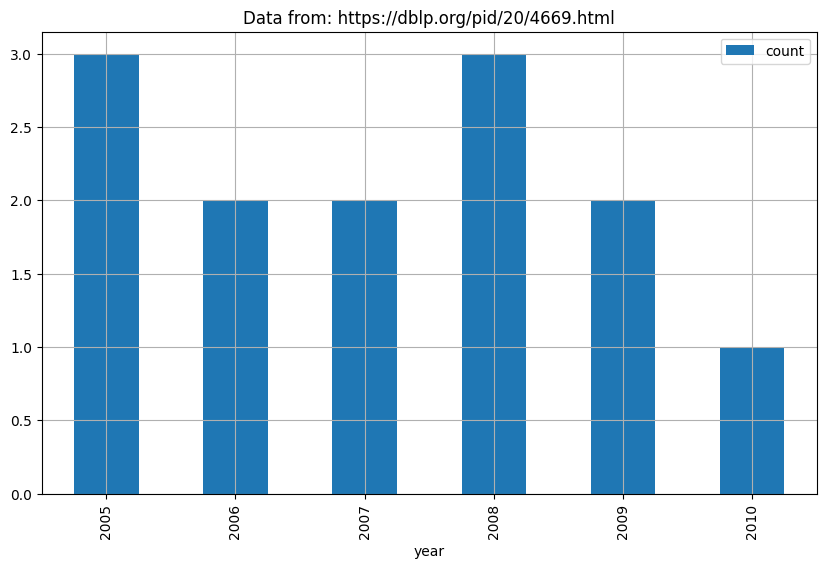

In [22]:
publications.groupby('year')\
    .count()\
    .rename(columns = {'title':'count'})\
    .plot(y='count', kind='bar', grid=True, figsize=(10, 6), title='Data from: ' + URL)